##### Finding the Max Sharpe Ratio Portfolio (MSR)
We've already seen that given a set of expected returns and a covariance matrix, we can plot the efficient frontier. In this section, we will extend the code to locate the point on the efficient frontier that we are most interested in, which is the tangency portfolio or Max Sharpe Ratio Portfolio.

Let's start by the usual imports, and load in the data.

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import portfolio_management_lib as port

ind = port.get_ind_returns()
ind_needed = ind["1996": "2000"]
er = port.annualize_rets(ind_needed, "Monthly")
cov = ind_needed.cov()

/home/joe/Study/portfolio_management_prac/lib/portfolio_management_lib.py:237: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ind = pd.read_csv("data/ind30_m_vw_rets.csv", header=0, index_col=0, parse_dates=True)/100


We already know how to identify points on the curve if we are given a target rate of return. Instead of minimizing the `vol` based on a targe return, we want to find that one point on the curve that maximizes the Sharpe Ratio, given the risk free rate.
``` Python
def msr(
    expected_return,
    cov,
    riskfree_rate,
):
    """
    Returns the weights of the portfolio that gives you the maximum sharpe ratio
    given the riskfree rate and expected returns and a covariane matrix.
    """
    n = expected_return.shape[0]
    init_guess = np.repeat(1 / n, n)
    bounds = ((0.0, 1.0),) * n # n-tuple of 2d array
    wegith_sum_to_1 = {
        'type': 'eq',
        'fun': lambda weights: np.sum(weights) - 1
    }

    def neg_sharpe(
        weights,
        riskfree_rate,
        expected_return,
        cov
    ):
        """
        Returns the negative of the Sharpe ratio
        of the given portfolio
        """
        r = portfolio_return(weights, expected_return)
        vol = portfolio_vol(weights, cov)
        return - (r - riskfree_rate) / vol # return sharpe raio

    weights = minimize(
        neg_sharpe,
        init_guess,
        args = (riskfree_rate, er, cov),
        method = "SLSQP",
        options = {"disp": False},
        constraints = (weights_sum_to_1),
        bounds = bounds,
    )
    return weights.x
```

Let's guess where the point might be:

(0.0, 0.14178637534840768)

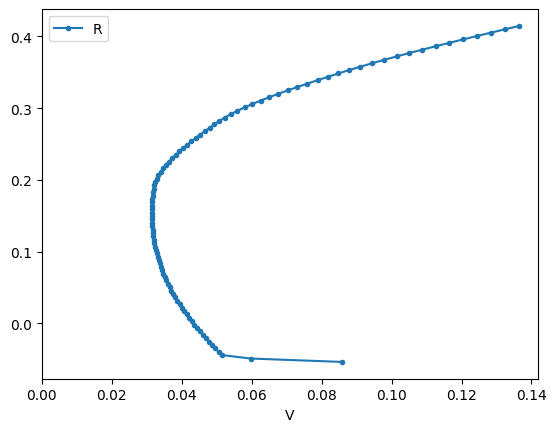

In [7]:
ax = port.plot_ef(er, cov, 100)
ax.set_xlim(left = 0)

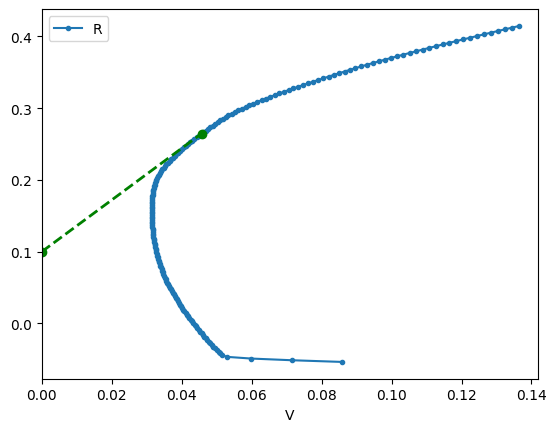

In [15]:
# plot EF
ax = port.plot_ef(er, cov, 200)
ax.set_xlim(left = 0)

# get Minimum Sharpe Ratio Point
rf = 0.1
w_msr = port.msr(er, cov, rf)
ret_msr = port.portfolio_ret(w_msr, er)
vol_msr = port.portfolio_vol(w_msr, cov)

# add Capital Market Line
cml_x = [0, vol_msr]
cml_y = [rf, ret_msr]
ax.plot(cml_x, cml_y, color = 'green', marker = 'o', linestyle = 'dashed', linewidth = 2)

In [16]:
ret_msr, vol_msr

(np.float64(0.26473948288033194), np.float64(0.04571973231103104))

Let's put it all together by adding the CML to the plot_ef code.

Add the following code:
``` Python
    if show_cml:
        ax.set_xlim(left = 0)

        # get MSR
        weight_msr = msr(riskfree_rate, er, cov)
        ret_msr = portfolio_return(weight_msr, er)
        vol_msr = portfolio_vol(weght_msr, cov)

        # add CML
        cml_x = [0, vol_msr]
        cml_y = [riskfree_rate, r_msr]
        ax.plot(
            cml_x,
            cml_y,
            color = "green",
            marker = 'o',
            linestyle = 'dashed',
            linewidth = 2,
            markersize = 12,
        )
```